In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [34]:
data = 'base_corrigida.xlsx'
df = pd.read_excel(data)

In [35]:
df.head()

,data_transacao,ano_veiculo,porte_veiculo,tipo_combustivel,litros,vl_por_litro,km_rodados,km_por_litro,vl_emissao
0,2022-01-01,2020,PEQUENO,GASOLINA COMUM,15.55,7.567,150,9.65,117.68
1,2022-01-01,2020,PEQUENO,GASOLINA COMUM,50.37,7.569,500,9.93,381.26
2,2022-01-01,2005,PEQUENO,GASOLINA COMUM,10.08,7.569,300,29.76,76.30
3,2022-01-01,2015,PEQUENO,GASOLINA COMUM,10.07,7.571,300,29.79,76.25
4,2022-01-01,2014,PESADO,DIESEL S10,70.00,5.714,500,7.14,400.00


In [36]:
df.describe()

,data_transacao,ano_veiculo,litros,vl_por_litro,km_rodados,km_por_litro,vl_emissao
count,292608,292608.000000,292608.000000,292608.000000,292608.000000,292608.000000,292608.000000
mean,2023-01-26 03:37:21.732283392,2016.895218,39.571528,6.435529,318.788570,10.075698,254.980200
min,2022-01-01 00:00:00,1968.000000,0.010000,3.790000,1.000000,0.010000,0.070000
25%,2022-07-01 00:00:00,2013.000000,25.930000,5.699000,234.000000,6.970000,164.200000
50%,2023-02-01 00:00:00,2019.000000,42.020000,6.249000,324.000000,8.000000,258.650000
75%,2023-08-01 00:00:00,2021.000000,50.000000,7.080000,405.000000,10.000000,329.500000
max,2024-06-01 00:00:00,2025.000000,300.000000,9.460000,500.000000,7500.000000,2337.000000
std,NaN,5.381671,19.786673,0.899210,114.547514,15.078068,134.483977


# ETL

In [37]:
# Verifying if we have null values

df.isnull().sum()

data_transacao      0
ano_veiculo         0
porte_veiculo       0
tipo_combustivel    0
litros              0
vl_por_litro        0
km_rodados          0
km_por_litro        0
vl_emissao          0
dtype: int64

In [41]:
# Converting categorical data
# We have 'porte_veiculo' and 'tipo_combustivel' as categorical data

df['porte_veiculo'] = df['porte_veiculo'].astype('category')

porte_veiculo = df['porte_veiculo'].cat.categories

df['porte_veiculo'] = df['porte_veiculo'].cat.codes

mapping = pd.DataFrame({'porte_veiculo': porte_veiculo, 'Code': range(len(porte_veiculo))})
print(mapping)

  porte_veiculo  Code
0         MEDIO     0
1       PEQUENO     1
2        PESADO     2


In [43]:
df['tipo_combustivel'] = df['tipo_combustivel'].astype('category')

tipo_combustivel = df['tipo_combustivel'].cat.categories

df['tipo_combustivel'] = df['tipo_combustivel'].cat.codes

mapping = pd.DataFrame({'tipo_combustivel': tipo_combustivel, 'Code': range(len(tipo_combustivel))})
print(mapping)

     tipo_combustivel  Code
0              DIESEL     0
1          DIESEL S10     1
2    ETANOL HIDRATADO     2
3  GASOLINA ADITIVADA     3
4      GASOLINA COMUM     4


In [44]:
df.head()

,data_transacao,ano_veiculo,porte_veiculo,tipo_combustivel,litros,vl_por_litro,km_rodados,km_por_litro,vl_emissao
0,2022-01-01,2020,1,4,15.55,7.567,150,9.65,117.68
1,2022-01-01,2020,1,4,50.37,7.569,500,9.93,381.26
2,2022-01-01,2005,1,4,10.08,7.569,300,29.76,76.30
3,2022-01-01,2015,1,4,10.07,7.571,300,29.79,76.25
4,2022-01-01,2014,2,1,70.00,5.714,500,7.14,400.00


# EDA

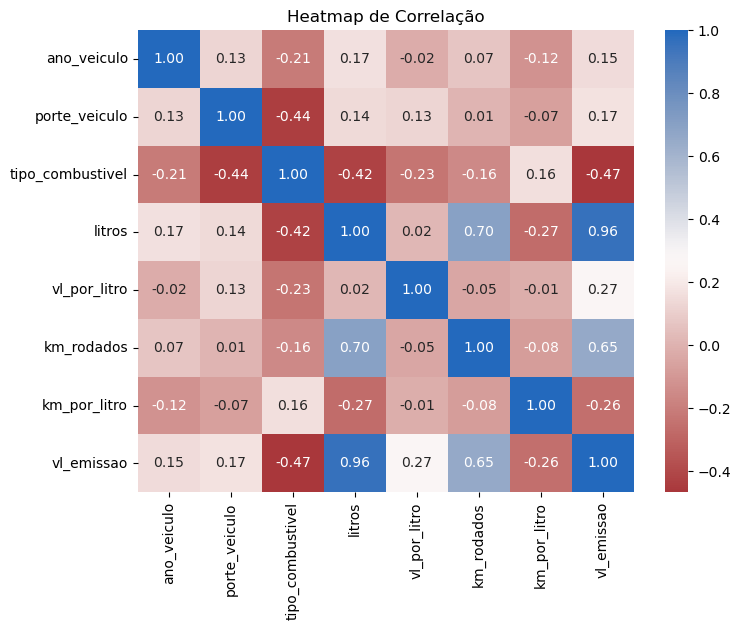

In [45]:
# Looking for the correlation between numerical variables

df_correlation = df.drop(['data_transacao'], axis=1)

correlation_matrix = df_correlation.corr()
plt.figure(figsize=(8, 6))
cmap = sns.color_palette("vlag_r", as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap)
plt.title('Heatmap de Correlação')
plt.show()

C:\Users\joaoc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


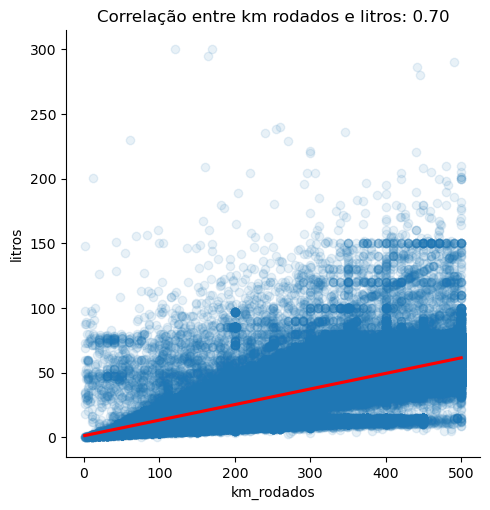

In [23]:
# lmplot between 'km_rodados' and 'litros'

correlation, _ = pearsonr(df['km_rodados'], df['litros'])

sns.lmplot(x = 'km_rodados',
           y = 'litros',
           data = df,
           scatter_kws = {'alpha' : 0.1},
           line_kws={'color': 'red'})

plt.title(f'Correlação entre km rodados e litros: {correlation:.2f}')
plt.show()

# Modeling

In [49]:
X = df.drop(['vl_emissao', 'data_transacao'], axis=1)
X

,ano_veiculo,porte_veiculo,tipo_combustivel,litros,vl_por_litro,km_rodados,km_por_litro
0,2020,1,4,15.55,7.567,150,9.65
1,2020,1,4,50.37,7.569,500,9.93
2,2005,1,4,10.08,7.569,300,29.76
3,2015,1,4,10.07,7.571,300,29.79
4,2014,2,1,70.00,5.714,500,7.14
...,...,...,...,...,...,...,...
292603,2013,1,4,60.00,6.340,480,8.00
292604,2013,2,1,60.00,6.190,270,4.50
292605,2019,2,1,45.00,6.050,234,5.20
292606,2013,1,4,49.27,6.089,384,7.79


In [51]:
y = df['vl_emissao']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [56]:
lr = LinearRegression()

In [57]:
lr.fit(X_train, y_train)

LinearRegression()

In [58]:
c = lr.intercept_
c

-165.6784845163992

In [59]:
m = lr.coef_
m

array([-3.80399254e-02, -2.27196838e-02, -7.82570988e-01,  6.58489979e+00,
        3.70842144e+01, -1.05722524e-02,  3.59135677e-01])

In [60]:
y_pred_train = lr.predict(X_train)

In [61]:
y_pred_train

array([276.25534906, 329.06413902, 283.84558986, ..., 320.98542373,
        41.02722786, 457.0421001 ])

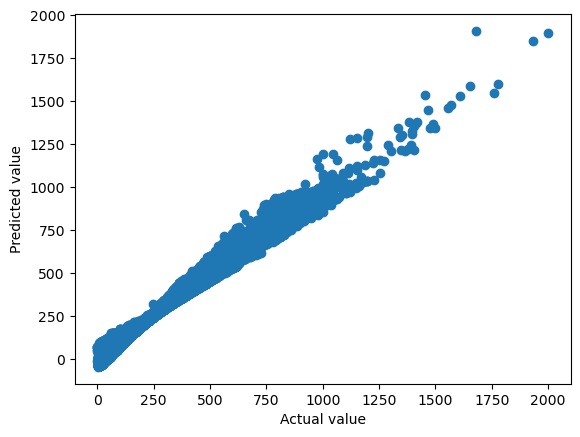

In [63]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.show()

In [65]:
r2_score(y_train, y_pred_train)

0.9837104434289907

In [66]:
y_pred_test = lr.predict(X_test)

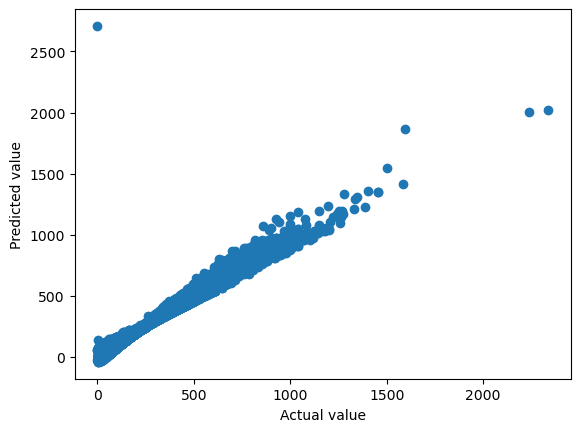

In [67]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.show()

In [68]:
r2_score(y_test, y_pred_test)

0.9792117896419482